In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
dataset = torchvision.datasets.ImageFolder("image_dataset/")

In [3]:
df = pd.read_csv('final_dataset.csv',index_col=0)

In [3]:
lista = []
for i in range(len(im.imgs)):
    break
    try:
        #sample_idx = torch.randint(len(im), size=(1,)).item()
        img, label = dataset[i]
        #figure.add_subplot(rows, cols, i)
        species_name = (list(dataset.class_to_idx.keys())[label]).replace('_',' ')
        #plt.title(species_name)
        #plt.axis("off")
        #plt.imshow(img, cmap="gray")
    #plt.show()
    except:
        lista.append(dataset.imgs[i])


NameError: name 'im' is not defined

In [ ]:
len(lista)


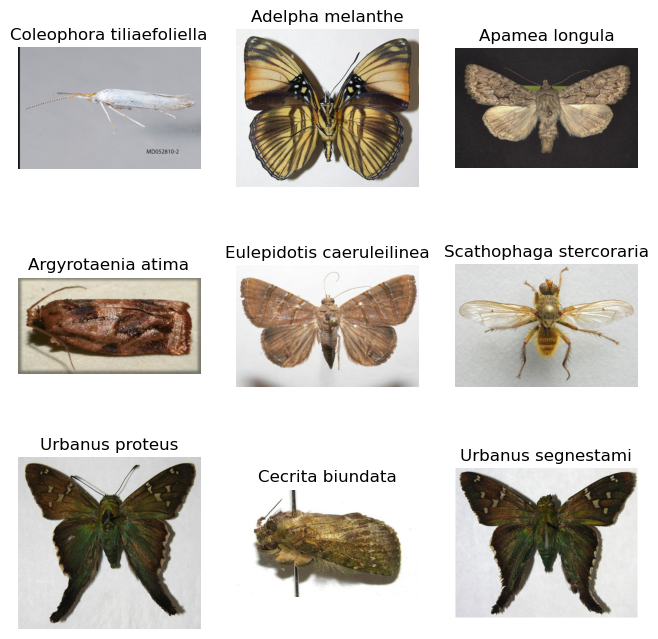

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    species_name = (list(dataset.class_to_idx.keys())[label]).replace('_',' ')
    plt.title(species_name)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

In [5]:
list(im.class_to_idx.keys())[5]

NameError: name 'im' is not defined

In [ ]:
asd = list(df['image_urls'])[0]
asd[asd.rfind('/')+1:]


In [ ]:
list(df['image_urls'])

In [ ]:
df = df[['processid','genus_name','species_name','nucleotide','image_urls']]

In [ ]:
for r in dataset.imgs:
    if 'Drosophila_affinis' in r[0]:
        print(r[0])

# For all the images in tha dataset we get the corresponding bold_id

In [4]:
img2dna = dict()
not_found_images = []
for i, row in df.iterrows():
    urls = row['image_urls'].split('|')
    species_name = row['species_name'].replace(' ','_')
    #if len(urls) >1 and row['species_name'] == 'Drosophila affinis':
    for url in urls:
        image_name_csv ='image_dataset/'+species_name+'/'+url[url.rfind('/')+1:]
        #print(image_name_csv)
        trovato = False
        for img in dataset.imgs:
            if img[0] == image_name_csv:
                img2dna[img[0]]= row['processid']
                trovato = True
                break
        if not trovato:
            not_found_images.append(image_name_csv)
        
        

In [ ]:
img2dna

In [ ]:
dataset

In [ ]:
df

In [ ]:
dataset.imgs

In [24]:
def data_split(df):
    test = []
    genus_count = df.groupby('genus_name')['species_name'].nunique()
    species_count = df.value_counts('species_name')
    
    for genus_name in genus_count.index:
        number_undescribed_species = genus_count[genus_name]//3
        species = list(df.loc[df['genus_name']==genus_name]['species_name'].unique())
        undescribed_species = random.sample(species,number_undescribed_species)
        test = test+undescribed_species

    df_remaining = df.loc[~df.species_name.isin(test)]
    df_undescribed = df.loc[df.species_name.isin(test)]
    
    y = df_remaining['species_name']
    X = df_remaining.drop(columns=['species_name'])
    
    y_undescribed = df_undescribed['species_name']
    X_undescribed = df_undescribed.drop(columns=['species_name'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    y_test = pd.concat([y_test,y_undescribed])
    X_test = pd.concat([X_test,X_undescribed])

    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = data_split(df)